In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Change directory
os.chdir('/Users/robinpark/Desktop/DataLab/GitHub/HbA1c-levels')

In [82]:
# Import function
def import_df(f_path):
    df = pd.read_csv(os.getcwd() + "/output/{}.csv".format(f_path))
    # Create percent of population
    df['pct'] = df['value']*100
    return df

In [83]:
df_pop = import_df('measure_hba1c_abnormal')
df_sex = import_df('measure_hba1c_abnormal_by_sex')
df_age = import_df('measure_hba1c_abnormal_by_age')
df_region = import_df('measure_hba1c_abnormal_by_region')
df_imd = import_df('measure_hba1c_abnormal_by_imd')

In [84]:
# Function to create charts
def create_chart(measure, ylabel, group, df):
    plt.figure(figsize = (15,8))
    if group=='population':
        ax = sns.lineplot(x = 'date', y = measure, data = df)
    else:
        ax = sns.lineplot(x = 'date', y = measure, hue = group, data = df)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.setp(labels, rotation=65)
    plt.show()

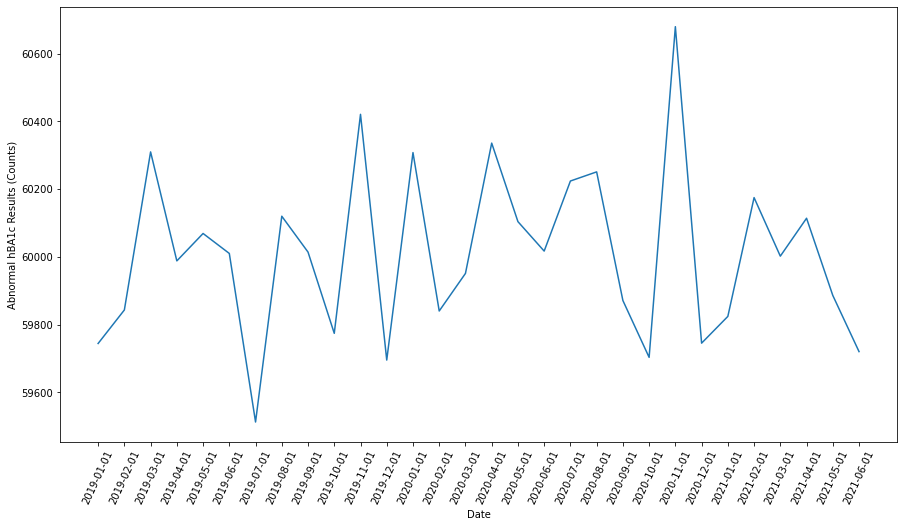

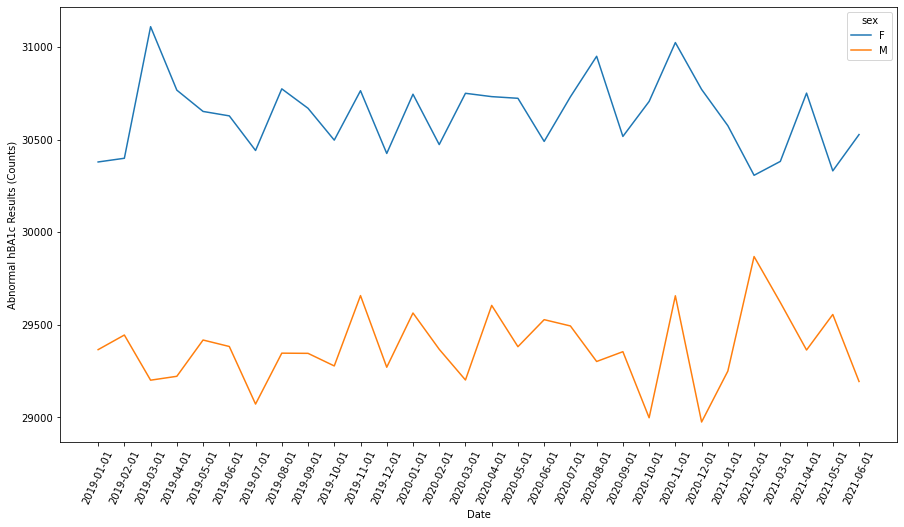

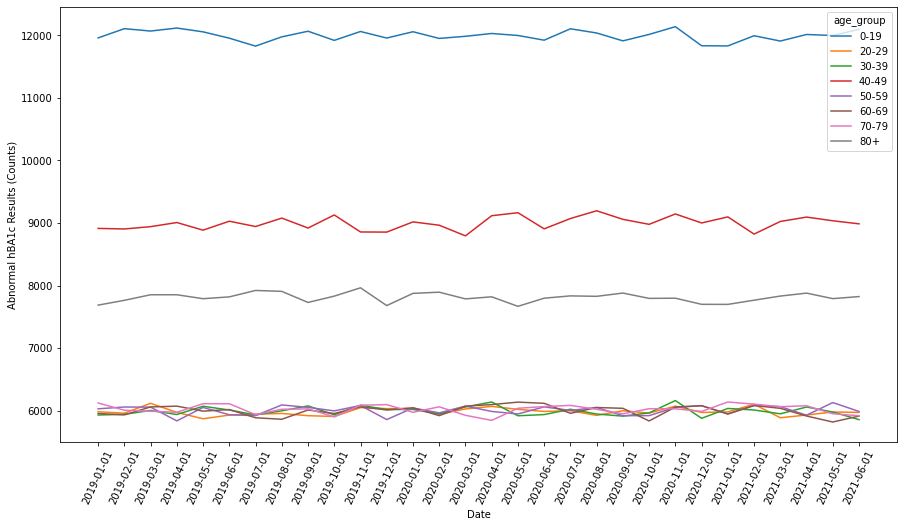

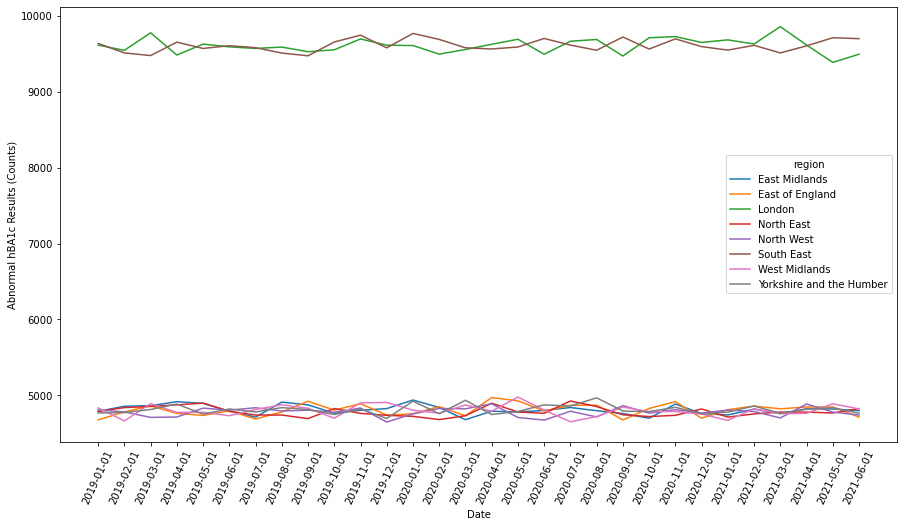

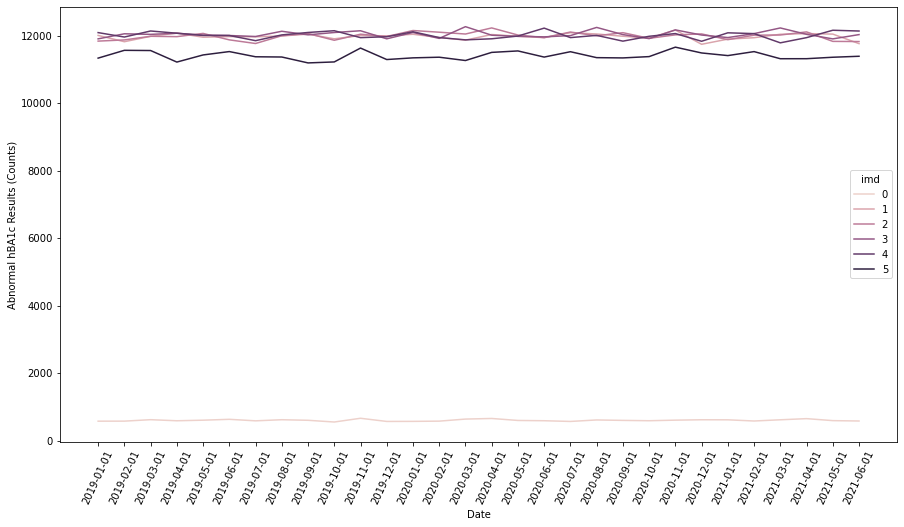

In [88]:
### Absolute measure

# Population
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)', 
             'population', df_pop)

# Sex
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'sex', df_sex)

# Age
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

# Region
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'region', df_region)

# Region
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'imd', df_imd)

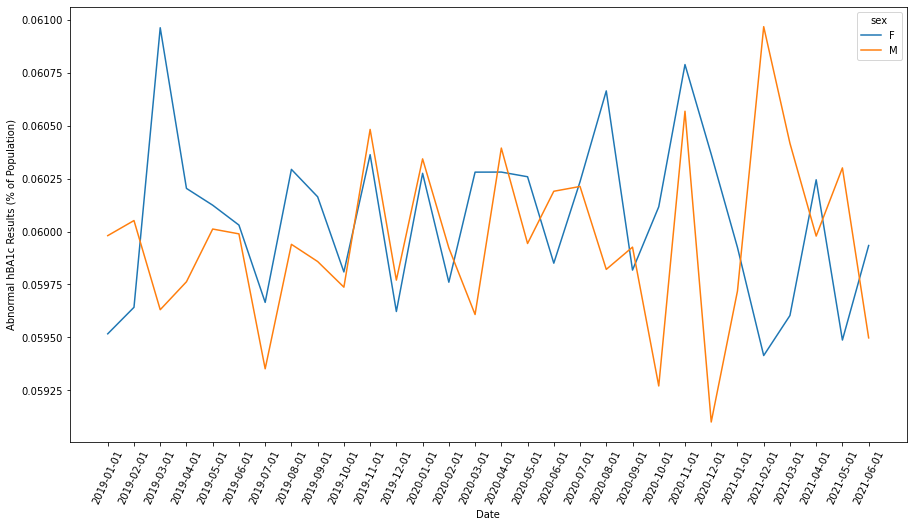

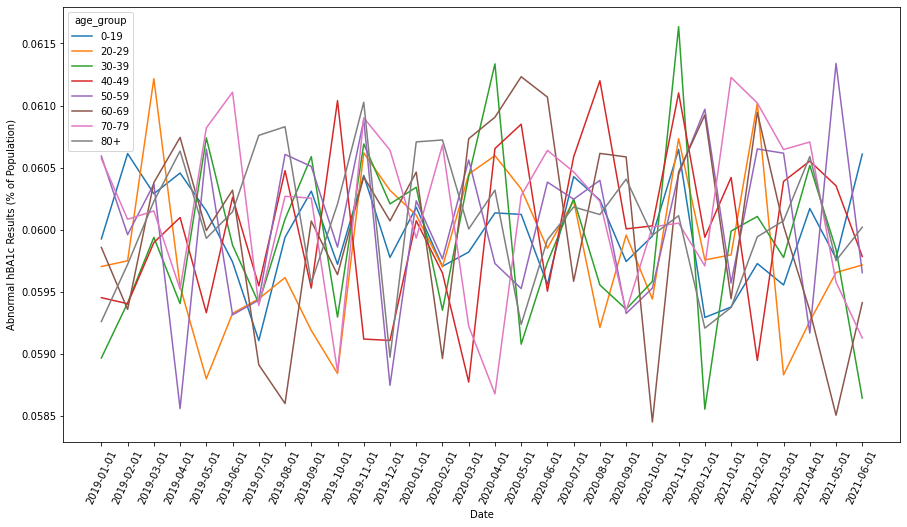

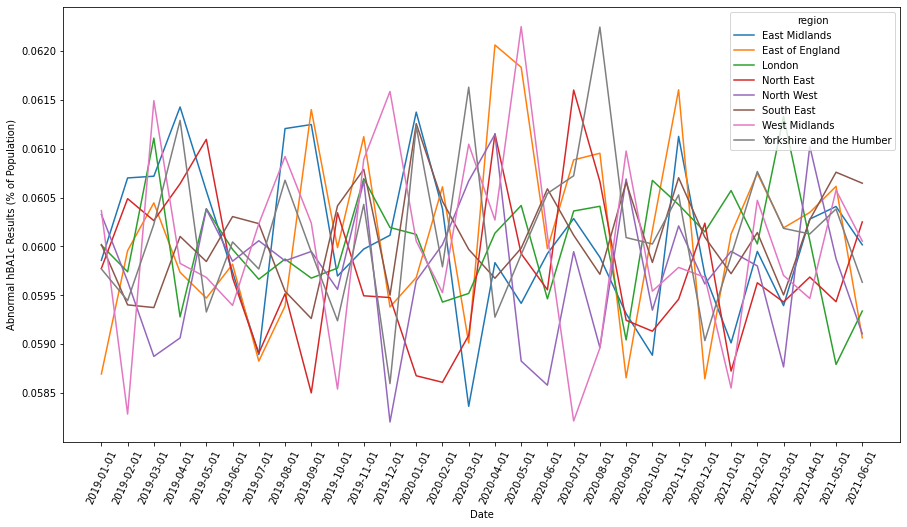

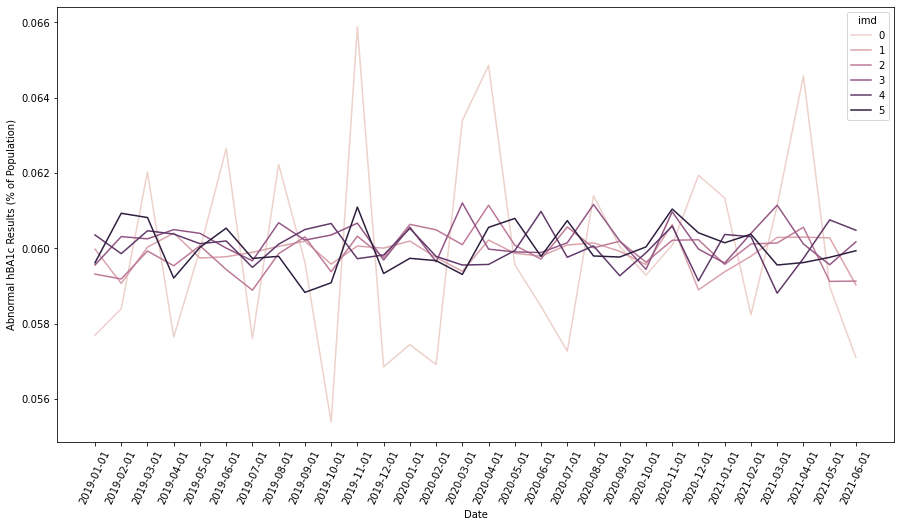

In [89]:
### Percentage of population

# Sex
create_chart('value', 'Abnormal hBA1c Results (% of Population)',
             'sex', df_sex)

# Age
create_chart('value', 'Abnormal hBA1c Results (% of Population)',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

# Region
create_chart('value', 'Abnormal hBA1c Results (% of Population)',
             'region', df_region)

# IMD
create_chart('value', 'Abnormal hBA1c Results (% of Population)',
             'imd', df_imd)